<h1 style="text-align:center">Arbres non binaires</h1>

Tous les arbres n'ont pas la structure simplifiée d'un arbre binaire.

## I - Arbres $n$-aires :

Certains possèdent potentiellement plus de deux fils à chaque noeud. On parlera ici d'arbre $n$-aire.

Pour cela, il suffit de remplacer les attributs `filsG` et `filsD` par une liste de fils :

In [ ]:
class NoeudN:
    def __init__(self, valeur, listeFils = []):
        self.valeur = valeur
        self.listeFils = listeFils


On peut définir un exemple simple :


In [ ]:
# Exemple
arbreSimple = NoeudN("Père",[NoeudN("Enfant1"), NoeudN("Enfant2"), NoeudN("Enfant3")])

print(arbreSimple.valeur)

print(arbreSimple.listeFils[0].valeur)
print(arbreSimple.listeFils[2].valeur)

**Exercice 1 :** Construire une fonction qui parcourt l'arbre et affiche ses différents éléments (avec des espaces supplémentaires à chaque génération).

Ainsi, `parcoursArbreN(arbresimple)` renverra :
```
Père
    Enfant1
    Enfant2
    Enfant3
```

In [ ]:
def parcoursArbreN(noeudN : NoeudN, espaces = 0):
    if noeudN != None:
        print(espaces*"   ", noeudN.valeur)
        for element in noeudN.listeFils:
            parcoursArbreN(element, espaces + 1)


On testera avec `arbreSimple` :

In [ ]:
parcoursArbreN(arbreSimple)


In [ ]:
# Illustration avec une troisième génération :
arbreSimple.listeFils[0].listeFils = [NoeudN("Petit-enfant 1"), NoeudN("Petit-enfant 2")]

parcoursArbreN(arbreSimple)


Compléter ci-dessous l'arbre qui correspond à cette arborescence de fichiers :
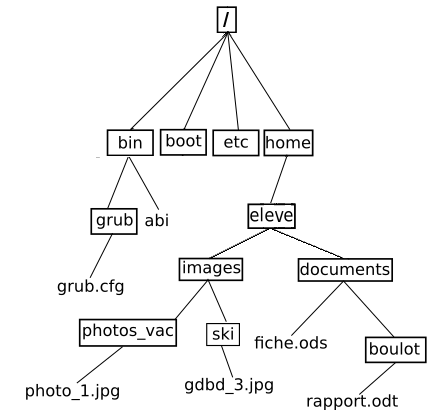

In [ ]:
arborescenceFichiers = NoeudN("/", [NoeudN("bin"),NoeudN("boot"),NoeudN("etc"),NoeudN("home")])
arborescenceFichiers.listeFils[0].listeFils = [NoeudN("grub"), NoeudN("abi")]
arborescenceFichiers.listeFils[0].listeFils[0].listeFils = [NoeudN("grub.cfg")]
arborescenceFichiers.listeFils[3].listeFils = [NoeudN("eleve")]


In [ ]:
parcoursArbreN(arborescenceFichiers)

**Exercice 2 :** Créer une fonction de recherche pour un arbre $n$-aire. Renvoie `True` si la valeur recherchée est présente dans l'arbre, `False` sinon.

In [ ]:
def estDansArbreN(noeudN, valeurRecherchee):
    pass


In [ ]:
#Tests :
estDansArbreN(arborescenceFichiers,"images2")


## II - Arbre TRIE

Nous allons nous intéresser à certains arbres particuliers permettant notamment de développer des notions fort utiles comme l'autocomplétion ou la correction orthographique : les arbres *trie*.

Le but est de créer des arbres comme celui-ci :
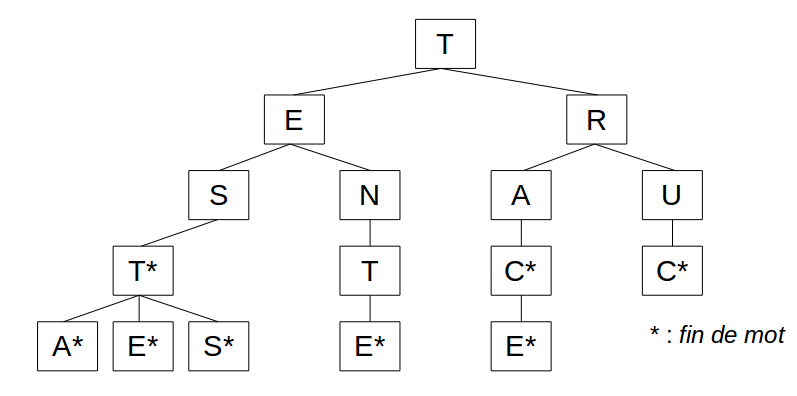


**Exercice 3 :**
1. Que fait l'arbre ci-dessus ?


2. Combien de mots sont stockés dans l'exemple ? Les donner sous forme de liste de `str` :

3. Quel est l'intérêt d'un tel arbre par rapport à la liste qui vient d'être faite ?


4. Coder la classe `NoeudTrie` qui permet de construire un arbre $n$-aire et de stocker la caractéristique supplémentaire (caractère de fin de mot ou pas)

In [ ]:
from copy import deepcopy

class NoeudTrie:
    pass
    # on fera cette fois une deepcopy de listeFils dans l'initialisation :
    # self.listeFils = deepcopy(listeFils)


5. Modifier en conséquence la fonction de parcours d'arbre de façon à visualiser le parcours avec les fins de mots précisés avec une étoile (*).

In [ ]:
def parcoursArbreTrie(noeudN, espaces = 0):
    pass


6. Construire l'arbre donné en exemple avec la classe `NoeudTrie`. On a déjà démarré ci-dessous la construction :

In [ ]:
lexique = NoeudTrie("", False, [NoeudTrie("T")]) # lexique = arbre trie
lexique.listeFils[0].listeFils = [NoeudTrie("E"), NoeudTrie("R")]
lexique.listeFils[0].listeFils[0].listeFils = [NoeudTrie("S"), NoeudTrie("N")]
lexique.listeFils[0].listeFils[0].listeFils[0].listeFils = [NoeudTrie("T", True)]
lexique.listeFils[0].listeFils[0].listeFils[0].listeFils[0].listeFils = \
[NoeudTrie("A", True),NoeudTrie("E", True),NoeudTrie("S", True)]
lexique.listeFils[0].listeFils[0].listeFils[1].listeFils = [NoeudTrie("T", False, [NoeudTrie("E", True)])]
lexique.listeFils[0].listeFils[1].listeFils = [NoeudTrie("U", False, [NoeudTrie("C", True)])]


In [ ]:
parcoursArbreTrie(lexique)


**Exercice 4 :** Ajouter des commentaires explicatifs dans le code de la fonction ci-dessous, qui insère une chaine de caractère (un **mot**) dans un arbre *trie* selon le principe : **1 caractère = 1 noeud**.

Ainsi TEST sera insérée ainsi :
* Valeur du noeud racine forcément vide
* T : Noeud fils de génération 1
* E : Noeud fils de génération 2
* S : Noeud fils de génération 3
* T : Noeud fils de génération 4

In [ ]:
def insereMot(noeudTrie, mot):
    if mot == "":
        return noeudTrie
    else:
        for index in range(len(noeudTrie.listeFils)):
            if noeudTrie.listeFils[index].valeur == mot[0]:
                if len(mot) == 1:
                    noeudTrie.listeFils[index].finMot = True
                noeudTrie.listeFils[index] = insereMot(noeudTrie.listeFils[index], mot[1:])
                return noeudTrie
        if len(mot) == 1:
            finMot = True
        else:
            finMot = False
        noeudTrie.listeFils.append(NoeudTrie(mot[0], finMot))
        noeudTrie.listeFils[-1] = insereMot(noeudTrie.listeFils[-1], mot[1:])
        return noeudTrie


In [ ]:
lexique = insereMot(lexique,"TESTEES")
lexique = insereMot(lexique,"TENTEES")
lexique = insereMot(lexique,"TRAC")
lexique = insereMot(lexique,"TRACEES")
lexique = insereMot(lexique,"TRUQUEES")


In [ ]:
# Test :
parcoursArbreTrie(lexique)


**Exercice 5 :** Créer une fonction qui liste tous les mots d'un arbre *trie*.

In [ ]:
def listeMotsTrie(noeudTrie, mot = '', listeMots = []):
    pass


In [ ]:
# Test :
listeMotsTrie(lexique)


**Exercice 6 :** *Manipuler un fichier texte*

Cet exercice vise à fournir des commandes pour manipuler un fichier texte en vue de l'exercice suivant. Les points 1 à 4 sont seulement des commandes déjà saisies à exécuter.

1. Ouvrir le fichier *exemple.txt*.

In [ ]:
fichierLu = open('exemple.txt', 'rt')


2. Lire toutes les lignes du fichier et les stocker dans une liste :

In [ ]:
lignesLues = fichierLu.readlines()


3. Fermer le fichier désormais inutile.

In [ ]:
fichierLu.close()


4. À l'aide de *slice* de liste, afficher les 3 premières lignes :

In [ ]:
print(lignesLues[0:3])


*Remarque* : Le caractère `\n` indique un renvoi à la ligne pour un fichier texte.

5. Afficher les 3 dernières lignes du fichier.

6. Afficher la première ligne du fichier, mais sans le caractère "\n".

On pourra faire un *slice* adapté sur la chaîne de caractères.

**Exercice 7 :**
Insérer dans un nouvel arbre trie nommé `dictionnaireComplet` l'ensemble des mots du dictionnaire stocké dans le fichier *dico.txt*.

&rarr; On commencera par manipuler un peu le fichier lui même afin de supprimer certaines lignes inutiles, puis on stockera le dictionnaire dans une liste `dictionnaireListe` avant d'insérer chaque terme de la liste dans l'arbre *trie*.

**Exercice 8 :**
À l'aide d'une boucle `for`, rechercher le mot anticonstitutionnellement dans la liste `dictionnaireListe` puis dans l'arbre `trie`. Combien d'étapes sont nécessaires dans chaque cas ?